In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

val_datagen=ImageDataGenerator(rescale=1./255)

In [2]:
train_generator=train_datagen.flow_from_directory(
    'BrainTumor/Training',
    target_size=(64, 64),
    batch_size=8,
    class_mode='binary'
)

Found 1222 images belonging to 2 classes.


In [3]:
validation_generator=val_datagen.flow_from_directory(
    'BrainTumor/Testing',
    target_size=(64, 64),
    batch_size=8,
    class_mode='binary',
    shuffle=False
)

Found 179 images belonging to 2 classes.


In [4]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = train_generator.num_classes

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2), 

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.3), 

    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [5]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # hyperparameter
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall(), 'AUC']
)

In [6]:
#Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15
)

Epoch 1/15
153/153 [==============================] - 85s 541ms/step - loss: 0.6584 - accuracy: 0.6735 - precision: 0.6763 - recall: 0.9927 - auc: 0.4337 - val_loss: 0.8257 - val_accuracy: 0.4134 - val_precision: 0.4134 - val_recall: 1.0000 - val_auc: 0.4602
Epoch 2/15
153/153 [==============================] - 17s 109ms/step - loss: 0.6332 - accuracy: 0.6833 - precision: 0.6824 - recall: 0.9952 - auc: 0.5549 - val_loss: 0.8594 - val_accuracy: 0.4693 - val_precision: 0.4379 - val_recall: 1.0000 - val_auc: 0.4897
Epoch 3/15
153/153 [==============================] - 15s 96ms/step - loss: 0.5958 - accuracy: 0.7185 - precision: 0.7417 - recall: 0.8960 - auc: 0.6715 - val_loss: 1.0076 - val_accuracy: 0.5140 - val_precision: 0.4581 - val_recall: 0.9595 - val_auc: 0.4490
Epoch 4/15
153/153 [==============================] - 17s 108ms/step - loss: 0.5584 - accuracy: 0.7529 - precision: 0.7698 - recall: 0.9057 - auc: 0.7205 - val_loss: 0.9595 - val_accuracy: 0.4749 - val_precision: 0.4057 - va

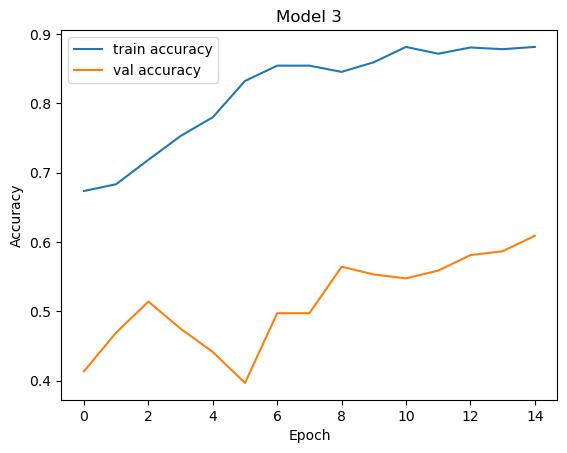

In [11]:
# Plotting Validation Curve
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model 3')
plt.show()

In [8]:
y_prob = model.predict(validation_generator) # Get predicted outputs
y_prob = y_prob.ravel()

23/23 [==============================] - 2s 64ms/step


In [9]:
y_true = validation_generator.classes #Get classes for predicted output

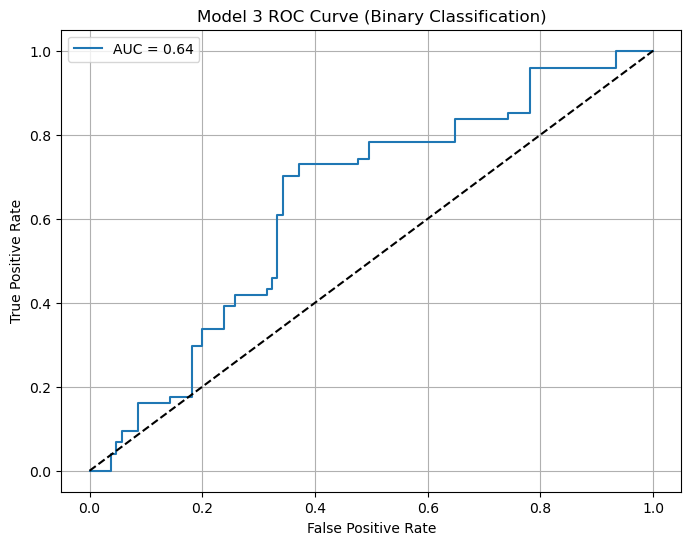

In [12]:
#Plotting AUC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model 3 ROC Curve (Binary Classification)')
plt.legend()
plt.grid(True)
plt.show()